## CS 109B/STAT 121B/AC 209B/CSCI E-109B: Homework 6
### Neural Networks - CNNs and RNNs
** Harvard University ** <br>
** Spring  2018 ** <br>
** Instructors:** Pavlos Protopapas and Mark Glickman 

---

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- Do not include your name(s) in the notebook if you are submitting as a group. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

---

** Your partner's name (if you submit separately): **

** Enrollment Status (109B, 121B, 209B, or E109B): 209B**

## Problem 1: Convolutional Neural Network Basics  (10 pts)

In convolutional neural networks, a convolution is a multiplicative operation on a local region of values. Convolutional layers have been very useful in image classification, as it allows the network to retain local spatial information for feature extraction.

### Part A: Understanding Convolutional Operations

For the following 2D matrix:

| | | |
|--|--|--|
|1|2|2|
|3|1|2|
|4|1|0|

Use the following 2x2 kernel to perform a 2D convolution on the matrix:

| | |
|--|--|
|2|1|
|1|2|

**1. Compute this operation by hand assuming a) valid, b) same, and c) full border modes. Please indicate what the resulting matrix shape is compared to the original shape. **

---
## *Answers*
<span style="color:blue">
a) Valid border - the shape of the resulting matrix shrinks by (kernel width - 1 = 2 - 1 = 1), compared to the original shape. Therefore, the original matrix shrinks from 3x3 to 2x2.
<br>
<br>
output = $
\begin{bmatrix}
9 & 11 \\
13 & 5
\end{bmatrix}$ (shape: 2 by 2)


<span style="color:blue">
b) Same border - Pad zeros to the input so that the resulting convolution feature map is of the same size as the original input (3x3). 
<br>
<br>
If zeros are padded on the right and bottom edges, input with padding = $\begin{bmatrix}
1 & 2 & 2 & 0 \\
3 & 1 & 2 & 0 \\
4 & 1 & 0 & 0 \\
0 & 0 & 0 & 0
\end{bmatrix}$ (shape: 4 by 4) <br>
output = $\begin{bmatrix}
9 & 11 & 6 \\
13 & 5 & 4 \\
9 & 2 & 0
\end{bmatrix}$ (shape: 3 by 3)
<br>
<br>
If zeros are padded on the left and top edges, input with padding = $\begin{bmatrix}
0 & 0 & 0 & 0 \\
0 & 1 & 2 & 2 \\
0 & 3 & 1 & 2 \\
0 & 4 & 1 & 0 
\end{bmatrix}$ (shape: 4 by 4) <br>
output = $\begin{bmatrix}
2 & 5 & 6 \\
7 & 9 & 11 \\
11 & 13 & 5
\end{bmatrix}$ (shape: 3 by 3)
</span>

<span style="color:blue">
c) Full border - Pad zeros so that each pixel in the original input is visited the same number of times (which is 4 in this case).
<br>
<br>
input with padding = $\begin{bmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & 1 & 2 & 2 & 0 \\
0 & 3 & 1 & 2 & 0 \\
0 & 4 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0
\end{bmatrix}$  (shape: 5 by 5) <br>
output = $\begin{bmatrix}
2 & 5 & 6 & 2 \\
7 & 9 & 11 & 6 \\
11 & 13 & 5 & 4 \\
4 & 9 & 2 & 0
\end{bmatrix}$ (shape: 4 by 4)
</span>

---

### Part B: Understanding Pooling Operations

Pooling operations are used in convolutional neural networks to reduce the dimensionality of the feature maps and overall network complexity. Two main types of pooling are used in CNNs: AveragePooling and MaxPooling.

** 1. Using the matrix below, write the output of the AveragePooling and MaxPooling operations with a pool size of 2x2 and stride 2x2. Then, write the outputs for the same operations, except with a stride size of 1.**


| | | | |
|--|--|--|--|
|1|2|2|4|
|3|1|2|1|
|4|1|0|2|
|5|2|2|1|

---
## *Answers*
<span style="color:blue">
a) AveragePooling - stride 2x2 
$$
\begin{bmatrix}
1.75 & 2.25\\
3.0 & 1.25
\end{bmatrix}
$$
</span>

<span style="color:blue">
b) MaxPooling - stride 2x2 
$$
\begin{bmatrix}
3 & 4\\
5 & 2
\end{bmatrix}
$$
</span>


<span style="color:blue">
c) AveragePooling - stride 1x1 
$$
\begin{bmatrix}
1.75 & 1.75 & 2.25 \\
2.25 & 1.0 & 1.25 \\
3.0 & 1.25 & 1.25
\end{bmatrix}
$$
</span>

<span style="color:blue">
d) MaxPooling - stride 1x1 
$$
\begin{bmatrix}
3 & 2 & 4 \\
4 & 2 & 2 \\
5 & 2 & 2
\end{bmatrix}
$$
</span>

---

### Part C: Puppy Example 

Consider the following image of a dog, which you will find in `dog.jpg`:

![dog](dog.jpg)

Load the image as a 2D Numpy array. Normalize the image by the following operation so that values fall within [-0.5, 0.5].

**Perform the following steps for four images:**

**1. Randomly generate a 3x3 kernel.**

**2. Use this kernel and convolve over the image with same border mode (with [scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)).**

**3. In the resulting image, set all pixel values less than zero to zero (using np.clip()). In other words:**


`
if x < 0:
    x = 0
else:
    x = x
`

(This is the `ReLU` activation function.)

**4. Plot the image.**

Take a moment to examine the convolved images. You should see that certain features in the puppy are accentuated, while others are de-emphasized. Now consider the effect of performing additional convolution operations on these filtered images and how to they relate to additional layers in a neural network.

In [1]:
import numpy as np
import scipy as sp
from scipy import signal
from imageio import imread
from copy import deepcopy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D, Activation, Embedding, LSTM
from keras.optimizers import SGD
from keras import regularizers
from keras.datasets import cifar10

from keras.models import Model

%matplotlib inline

/usr/share/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def normalize(X, a, b):
    X_norm = deepcopy(X)
    if X.max() - X.min() != 0:
        X_norm = (b-a) * (X - X.min()) / (X.max() - X.min()) + a
    return X_norm

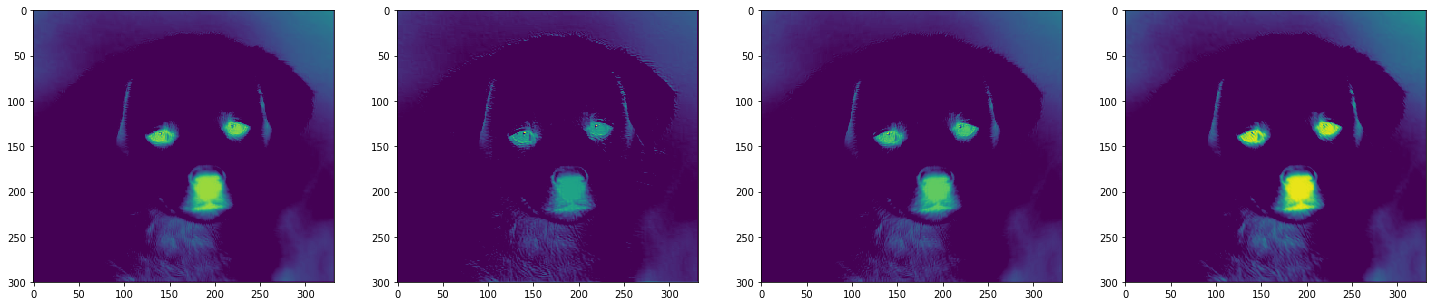

In [3]:
np.random.seed(900)
# read in dog image as np array
img = np.array(imread("dog.jpg"))

fig, ax = plt.subplots(1, 4, figsize=(25, 5))

# generate 4 different random kernels to see different affects
for i in range(4):

    # randomly generate a 3x3 kernel
    rand_kernel = np.random.randn(3,3)

    # normalize the values to fall within [-0.5, 0.5]
    img_norm = normalize(img, -0.5, 0.5)
    
    # apply 2D convolution
    img_conv = signal.convolve2d(img_norm, rand_kernel, mode='same')

    # apply relu
    img_relu = np.clip(img_conv, 0, None)
    ax[i].imshow(img_relu)

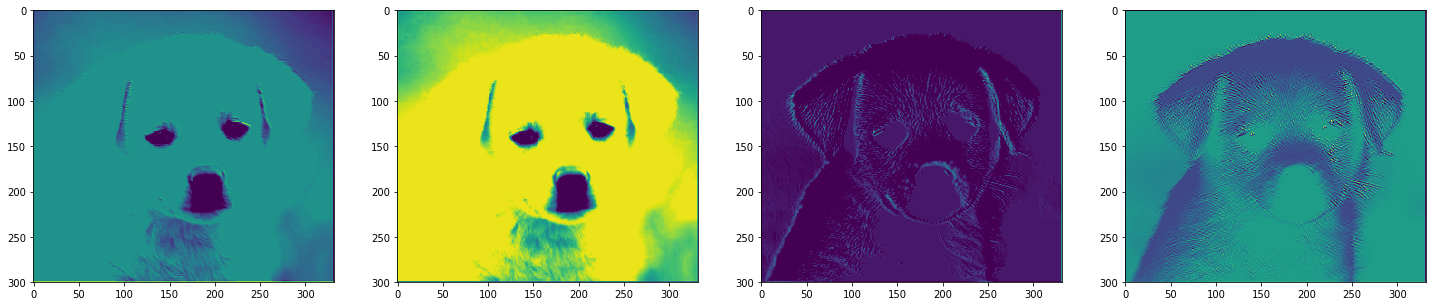

In [4]:
np.random.seed(900)
# read in dog image as np array
img = np.array(imread("dog.jpg"))

fig, ax = plt.subplots(1, 4, figsize=(25, 5))

# generate 4 different random kernels to see different affects
for i in range(4):
    # first layer
    # randomly generate a 3x3 kernel
    rand_kernel = np.random.randn(3,3)

    # normalize the values to fall within [-0.5, 0.5]
    img_norm = normalize(img, -0.5, 0.5)
    
    # apply 2D convolution
    img_conv = signal.convolve2d(img_norm, rand_kernel, mode='same')

    # apply relu
    img_relu = np.clip(img_conv, 0, None)
    
    # second layer
    # randomly generate a second 3x3 kernel
    rand_kernel2 = np.random.randn(3,3)
    
    # normalize the values to fall within [-0.5, 0.5]
    img_norm2 = normalize(img_relu, -0.5, 0.5)
    
    # apply second 2D convolution
    img_conv2 = signal.convolve2d(img_norm2, rand_kernel2, mode='same')
   
    # apply relu
    img_relu2 = np.clip(img_conv2, 0, None)
    ax[i].imshow(img_relu2)

---
## *Answers*

The convolved images accentuated the eyes, the nose and the edges of its ears of the dog while de-emphasized the overall figure. The effect of the second-layer convolution operation on the re-normalized filtered images detected the overall figure. Therefore we think the first few layers of a CNN detect some local features while the additional deeper layers detect more overall/abstract features.

---

## Problem 2: Running a Convolutional Neural Network (20 pts) 

### Part A: Building the Model

In this first part, you will create a convolutional neural network using Keras to predict the type of object in an image. Load the [CIFAR-10](https://keras.io/datasets/#cifar10-small-image-classification) dataset, which contains 50,000 32x32 training images and 10,000 test images of the same size, with a total of 10 sizes.

Use a combination of the [following layers](https://keras.io/layers/convolutional/): Conv2D, MaxPooling2D, Dense, Dropout and Flatten Layers (not necessarily in this order).
You may use an existing architecture like AlexNet or VGG16, or create one of your own design. However, you should write your own layers and not use a pre-written implementation.

Convolutional neural networks are very computationally intensive. We highly recommend that you train your model on JupyterHub using GPUs. On CPUs, this training can take up to several hours. On GPUs, it can be done within minutes.

** 1. Report the total number of parameters.**

** 2. How does the number of total parameters change (linearly, exponentially) as the number of filters per layer increases?**

** 3. Generate a plot showing this relationship and explain why.**

For instance, start by assigning 32 filters to each Conv2D layer, then 64, 128, etc. and recording the total number of parameters for each model.





In [5]:
def cnn_model(optimizer, n_filters, x_train):
    # model
    model = Sequential()
    model.add(Conv2D(n_filters, (3, 3), padding='same',
                     input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(n_filters, (3, 3), padding='same',
                     input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(n_filters, (3, 3), padding='same',
                     input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(n_filters, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(n_filters*2, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(n_filters*2, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(n_filters*2, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(n_filters*2, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(n_filters*4, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(n_filters*4, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(n_filters*4, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(n_filters*4, (3, 3)))
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    # compile the model using optimizer
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [6]:
# read in data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# specify some model parameters
num_classes = len(np.unique(y_train))
batch_size = 32
epochs = 25
n_filters = 32
optimizer = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
 # sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

# one hot encode the response y
y_train_onehot = keras.utils.to_categorical(y_train)
y_test_onehot = keras.utils.to_categorical(y_test)

model = cnn_model(optimizer, n_filters, x_train)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_3 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 32)        9248      
__________

In [7]:
# model = cnn_model(optimizer, n_filters=512)
# model.summary()

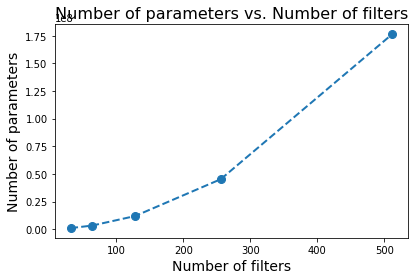

In [8]:
n_params = [942314, 3224522, 11825546, 45174026, 176456714]
n_filters = [32, 64, 128, 256, 512]

plt.plot(n_filters, n_params, 'o--', linewidth=2, markersize=8)
plt.xlabel("Number of filters", fontsize=14)
plt.ylabel("Number of parameters", fontsize=14)
plt.title("Number of parameters vs. Number of filters", fontsize=16)
plt.tight_layout()
plt.show()

---
## *Answers*

1. Report the total number of parameters.
> As summarized above, our model has a total of 942,314 parameters.

2. How does the number of total parameters change (linearly, exponentially) as the number of filters per layer increases?
> The total number of parameters within the entire network increases approximately linearly (with slightly increasing slope) as the number of filters grows.

3. Generate a plot showing this relationship and explain why.
> This relationship is plotted above. This is because Convolutional Neural Networks share the same parameters accross all kernels in the same layer. Suppose the biggest kernel size is $O(m^2)$, $L$ layers in total, then total # parameters in our CNN = 

$$\#Conv = n_{filters} (m^2+1) + 2^{1} n_{filters} (m^2+1) + \ldots + 2^{L-1} n_{filters} (m^2+1)$$ 

$$\#Dense = 2^{L-1} n_{filters} (m^2+1) (512+1) +(512) (10)$$

$$\#Total = \#Conv + \#Dense = O(m^22^L(n_{filters}))$$

---

## Part B: Training and Evaluating the Model
** Now train your model. You can choose to train your model for as long as you'd like, but you should aim for at least 10 epochs. ** Your validation accuracy should exceed 70%. Training for 10 epochs on a CPU should take about 30-60 minutes.

In [9]:
# # fit model
# model.fit(x_train, y_train_onehot,
#               batch_size=batch_size,
#               epochs=epochs,
#               validation_data=(x_test, y_test_onehot),
#               shuffle=True)

# # Save model and weights
# save_dir = os.path.join(os.getcwd(), 'saved_models')
# model_name = 'keras_cifar10_trained_model3.h5'

# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir)
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('Saved trained model at %s ' % model_path)

In [10]:
model = load_model('saved_models/keras_cifar10_trained_model3.h5')

In [11]:
scores = model.evaluate(x_test, y_test_onehot, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 4s 357us/step
Test loss: 0.8020128004074096
Test accuracy: 0.758


## Part C: Visualizing the Feature Maps

We would also like to examine the feature maps that are produced by the intermediate layers of the network.

**Using your model, extract 9 feature maps from an intermediate convolutional layer of your choice and plot the images in a 3x3 grid. Also plot your original input image (choose an image of your choice).**

You may use the helper function `get_feature_maps()` to extract weights.

In [12]:
def get_feature_maps(model, layer_id, input_image):
    model_ = Model(inputs=[model.input], outputs=[model.layers[layer_id].output])
    return model_.predict(np.expand_dims(input_image, axis=0))[0,:,:,:].transpose((2,0,1))

** Original image **

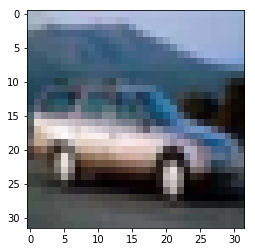

In [13]:
plt.imshow(x_train[4])

** 9 extracted feature maps **

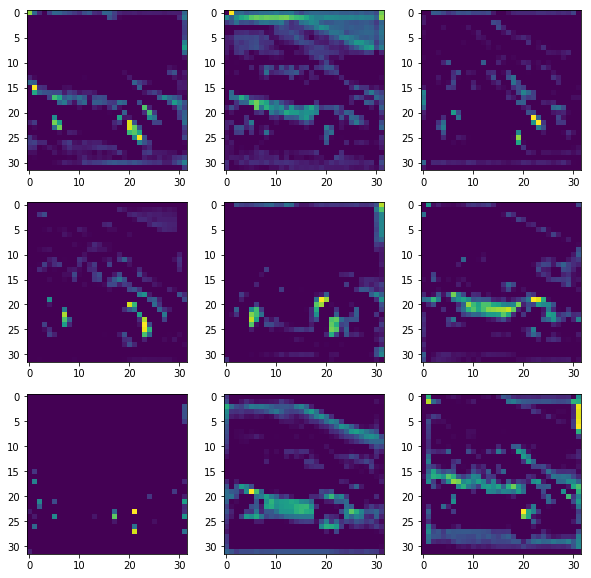

In [14]:
feature_maps = get_feature_maps(model, 3, x_train[4])[:9]
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i, feat_map in enumerate(feature_maps):
    if i <=2:
        ax[0][i].imshow(feat_map)
    elif i <= 5:
        ax[1][i-3].imshow(feat_map)
    else:
        ax[2][i-6].imshow(feat_map)

# Problem 3: Recurrent Neural Networks (20 pts)


## Learning to add numbers with a recurrent neural network

In this exercise, we will be using using recurrent neural network to add three digit numbers, encoded as character strings. 

For example, given a string '223+12', we would like to return '235', without teaching the model explicit addition rules.

You are given the class __CharacterTable__ to assist with encoding and decoding,  which is initialized below:

In [15]:
from HW6_functions import *
chars = '0123456789+ '
ctable = CharacterTable(chars)

__CharacterTable__ contains functions _encode_ and _decode_.

_encode_ takes in a string and the number of rows needed in the one hot encoding.

_decode_ returns the string corresponding to the encoded one hot encoding.

An example of usage below:

In [16]:
encoded_123 = ctable.encode('123', 3)
print("Encoded Format: \n {}".format(encoded_123))
decoded_123 = ctable.decode(encoded_123)
print("Decoded Format: {}".format(decoded_123))

Encoded Format: 
 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Decoded Format: 123


## Generating Training Data

Your first task is to create the data to train on. Luckily, we have virtually unlimited training data because addition is trivial for Python.

You will populate two arrays, _problems_ and _answers_, which contain your predictors and target variables.

Examples from _problems_:

In [17]:
'    1+7'

'  12+10'

'520+880'

'520+880'

Examples from _answers_:

In [18]:
'8   '

'22  '

'1400'

'1400'

Notice that spaces are inserted to the left and right of strings within _problems_ and _answers_ to keep the dimensions of the input and output the same. When adding three digit numbers, the maximum possible length of a string in _problems_ is 7, while the maximum possible length of a string in _answers_ is 4.


In [19]:
# TRAINING_SIZE = 50000
# DIGITS = 3
# MAXLEN = DIGITS + 1 + DIGITS

In [20]:
# problems = []
# answers = []

** 1. Populate the two matrices _X_ and _y_, which contain the encoded version of problems and answers. **
The _i_ th row in both matrices should contain one encoded problem and answer, respectively. 

** 2. Next, shuffle your data and split it into training and validation sets. **
These matrices should be named x_train, y_train, x_val, and y_val.

In [21]:
def generate_training_data(size, n_digits):
    # max number is 10 to the power of n_digits
    MAX_NUMBER = np.power(10, n_digits)
    
    # set maximum length for problems and answers
    MAXLEN_PROB = n_digits + 1 + n_digits
    MAXLEN_ANS = n_digits + 1
    
    # randomly generate 2 sets of numbers, each of size=size
    first_number = np.random.randint(MAX_NUMBER, size=size)
    second_number = np.random.randint(MAX_NUMBER, size=size)
    
    # generate strings of problems
    problems = [str(x) + '+' + str(y) for x, y in zip(first_number, second_number)]
    answers = [str(x) for x in (first_number + second_number)]
    # add spaces to in front of the problems and answers that are not at max lengths
    for i, (prob, ans) in enumerate(zip(problems, answers)):
        if len(prob) < MAXLEN_PROB:
            problems[i] = ' ' * (MAXLEN_PROB-len(prob)) + prob 
        if len(ans) < MAXLEN_ANS:
            answers[i] = ans + ' ' * (MAXLEN_ANS-len(ans))
    return problems, answers

In [22]:
# generate problems and answers
TRAINING_SIZE = 50000
DIGITS = 3
problems, answers = generate_training_data(size=TRAINING_SIZE, n_digits=DIGITS)

In [23]:
# encode problems and answers
X = np.array([ctable.encode(x, 7) for x in problems])
y = np.array([ctable.encode(y, 4) for y in answers])

In [24]:
X.shape, y.shape

((50000, 7, 12), (50000, 4, 12))

In [25]:
# split into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((40000, 7, 12), (10000, 7, 12), (40000, 4, 12), (10000, 4, 12))

## Building the Model

** 1. Using Keras, create a recurrent model that takes in _X_ and returns _y_. **
You are free to choose LSTM, or just a vanilla RNN to implement your model. Your model should take in NUM_LAYERS as a parameter.

** 2. Create and train models with 1, 2, and 3 layers over 50 epochs. Plot test accuracy as a function of epoch for each model. **
Note: You do not have to print the progress bars for each model in your final report, you only have to include the accuracy plots.

** 3. Which model has the highest test accuracy? By looking at the accuracy over epochs, what can you say about how depth affects training and performance for recurrent models? **

In [26]:
BATCH_SIZE = 128
LAYERS = [1, 2, 3]
EPOCHS = 50
NODES = 128
MAXLEN = DIGITS + 1 + DIGITS
CHAR_LEN = len(chars)
DIGITS = 3

In [27]:
def LSTM_model(n_nodes, n_layers, maxlen, chars_length, n_digits):
    model = Sequential()
    # first layer
    model.add(LSTM(n_nodes, input_shape=(maxlen, chars_length)))
    model.add(layers.RepeatVector(n_digits + 1))
    # add layers based on LAYERS variable
    for _ in range(n_layers):
        model.add(LSTM(n_nodes, return_sequences=True))

    # Apply a dense layer to the every temporal slice of an input. For each of step
    # of the output sequence, decide which character should be chosen.
    model.add(layers.TimeDistributed(layers.Dense(chars_length)))
    model.add(layers.Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [28]:
val_loss_final = []
val_acc_final = []
val_loss_epoch = []
val_acc_epoch = []
for layer in LAYERS:
    model = LSTM_model(NODES, layer, MAXLEN, CHAR_LEN, DIGITS)
    print('Layer: ', layer)
    print('Fitting model')
    history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), verbose=0, shuffle=True)
    val_loss_epoch.append(history.history['val_loss'])
    val_acc_epoch.append(history.history['val_acc'])
    
    # calculate final scores
    print('Final Validation...')
    scores = model.evaluate(X_val, y_val, verbose=1)
    print('Validation loss:', scores[0])
    print('Validation accuracy:', scores[1])
    print('--------------------------------------')
    val_loss_final.append(scores[0])
    val_acc_final.append(scores[1])
    
    # Save model and weights
    save_dir = os.path.join(os.getcwd(), 'saved_models')
    model_name = 'LSTM_layer_' + str(layer) + '.h5'

    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
    model_path = os.path.join(save_dir, model_name)
    model.save(model_path)
    print('Saved trained model at %s ' % model_path)


Layer:  1
Fitting model
Final Validation...
10000/10000 [==============================] - 2s 172us/step
Validation loss: 0.034280417773127556
Validation accuracy: 0.990525
--------------------------------------
Saved trained model at /home/ubuntu/AC209b/HW6/109/saved_models/LSTM_layer_1.h5 
Layer:  2
Fitting model
Final Validation...
10000/10000 [==============================] - 2s 219us/step
Validation loss: 0.01872033587358892
Validation accuracy: 0.99365
--------------------------------------
Saved trained model at /home/ubuntu/AC209b/HW6/109/saved_models/LSTM_layer_2.h5 
Layer:  3
Fitting model
Final Validation...
10000/10000 [==============================] - 3s 270us/step
Validation loss: 0.09582543868124485
Validation accuracy: 0.9684
--------------------------------------
Saved trained model at /home/ubuntu/AC209b/HW6/109/saved_models/LSTM_layer_3.h5 


#### Plotting accuracies

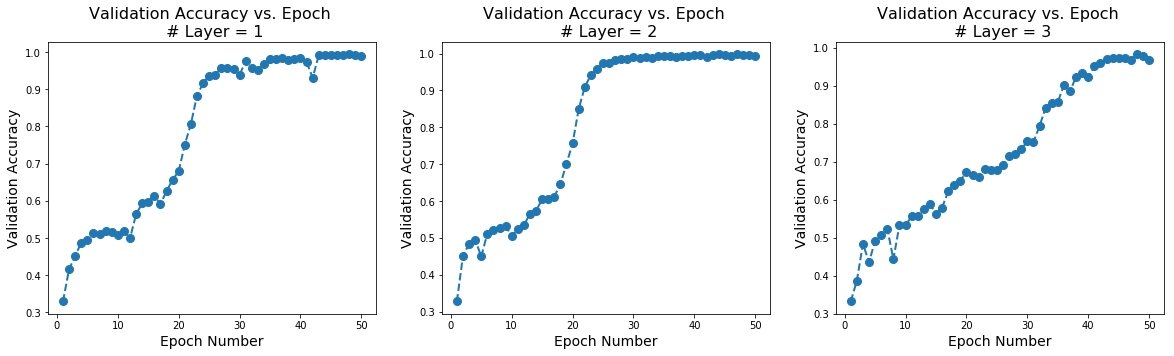

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
epoch = [j for j in range(1, EPOCHS+1)]
for i, acc in enumerate(val_acc_epoch):
    ax[i].plot(epoch, acc, 'o--', linewidth=2, markersize=8)
    ax[i].set_xlabel("Epoch Number", fontsize=14)
    ax[i].set_ylabel("Validation Accuracy", fontsize=14)
    ax[i].set_title("Validation Accuracy vs. Epoch \n # Layer = {}".format(i+1), fontsize=16)
    